# **Import library & load data**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

In [4]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df.head

<bound method NDFrame.head of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban   

# **Data Preprocessing**

Checking for duplicate value

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

Checking for null values

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We can see that there are 201 null values in bmi column. Instead of removing the null values, we will fill the null values with the mean bmi

In [9]:
df['bmi'].fillna(df['bmi'].mean(),inplace = True)

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.age

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64

We can see that age is in float, so we change it to int

In [12]:
print(df[df['age'].isnull()])

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [13]:
df['age']= df['age'].astype(int)

In [14]:
df.age

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

Creating a variable called Bmi to store the specific bmi of the users

In [15]:
Bmi = pd.cut(df['bmi'], bins=[0, 19, 25, 100], labels=['Underweight', 'Ideal', 'Overweight or obese'])

In [16]:
Bmi.unique()

['Overweight or obese', 'Ideal', 'Underweight']
Categories (3, object): ['Underweight' < 'Ideal' < 'Overweight or obese']

Creating a variable called Agegroup to store specific age of the users

In [17]:
Agegroup = pd.cut(df['age'], bins=[0, 18, 50, 100], labels=['Below 18', '18 - 50', 'Above 50'])

In [18]:
Agegroup.unique()

['Above 50', '18 - 50', 'Below 18', NaN]
Categories (3, object): ['Below 18' < '18 - 50' < 'Above 50']

# **EDA**

Let's see the no of people that suffered stroke

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


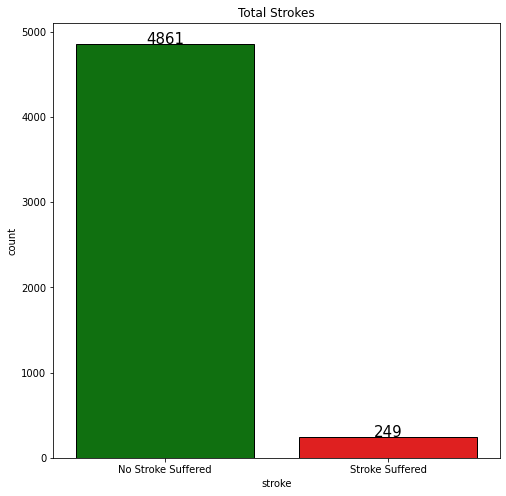

In [19]:
data1 = list(df['stroke'].value_counts())
circle = [data1[0] / sum(data1) * 100,data1[1] / sum(data1) * 100]
colors = ['Green','Red']

plt.subplots(figsize = (8,8))
ax = sns.countplot('stroke',data = df, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 15)
ax.set_xticklabels(['No Stroke Suffered','Stroke Suffered'])
plt.title('Total Strokes');
plt.show()

The genders recorded in our dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


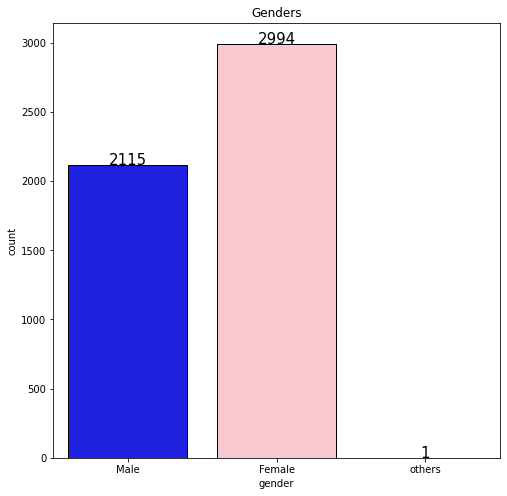

In [20]:
data = list(df['gender'].value_counts())
circle = [data[0] / sum(data) * 100,data[1] / sum(data) * 100]
colors = ['Blue','Pink','red']

plt.subplots(figsize = (8,8))
ax = sns.countplot('gender',data = df, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 15)
ax.set_xticklabels(['Male','Female','others'])
plt.title('Genders');
plt.show()

Percentage of patients with hypertension or not



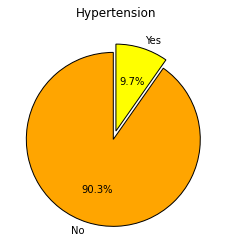

In [21]:
l = list(df['hypertension'].value_counts())
colors=['Orange','yellow']
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
plt.pie(circle,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Hypertension');

Plotting all the other improtant data in the form of graph. We will mainly focus on these data for this project

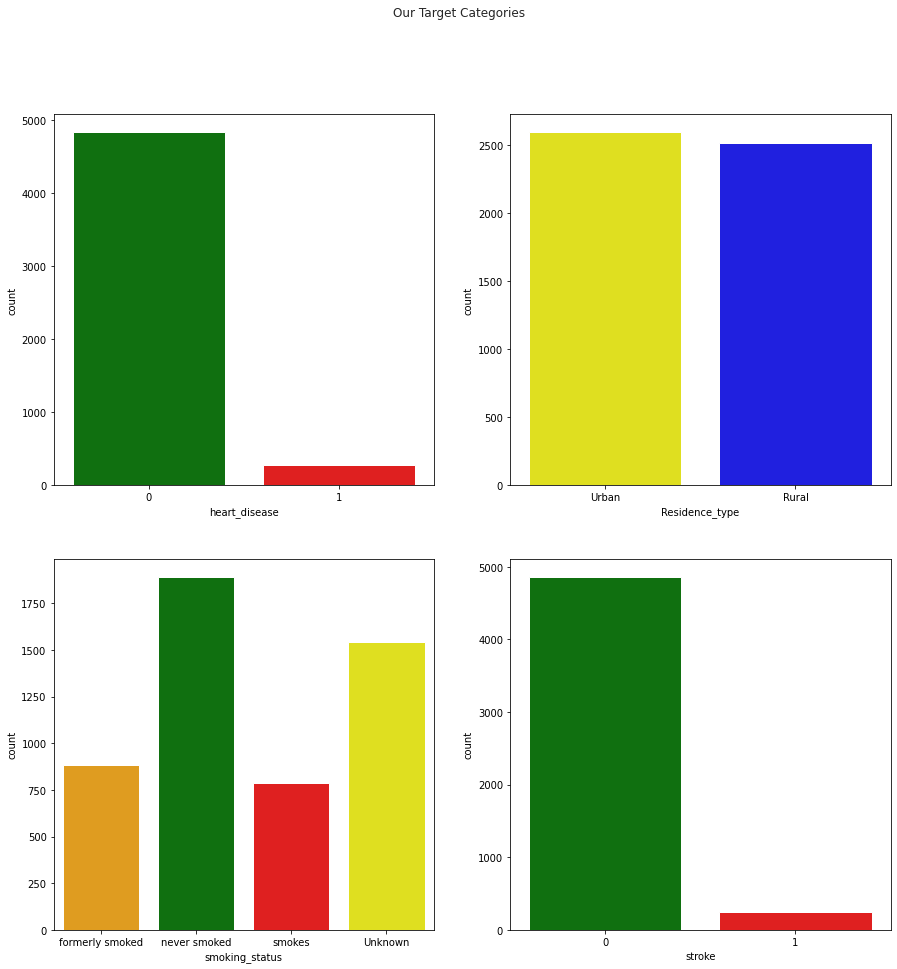

In [22]:
fig,axes = plt.subplots(2,2,figsize = (15,15))
sns.set_style('dark')
fig.suptitle("Our Target Categories")
colors = ['Green','Red']
colors2= ['Yellow','blue']
colors3= ['orange','Green','red','yellow']
sns.countplot(ax=axes[0,0],data=df,x='heart_disease',palette = colors)
sns.countplot(ax=axes[0,1],data=df,x='Residence_type',palette = colors2)
sns.countplot(ax=axes[1,0],data=df,x='smoking_status',palette = colors3)
sns.countplot(ax=axes[1,1],data=df,x='stroke',palette = colors)

plt.show()

Age group Based on Gender

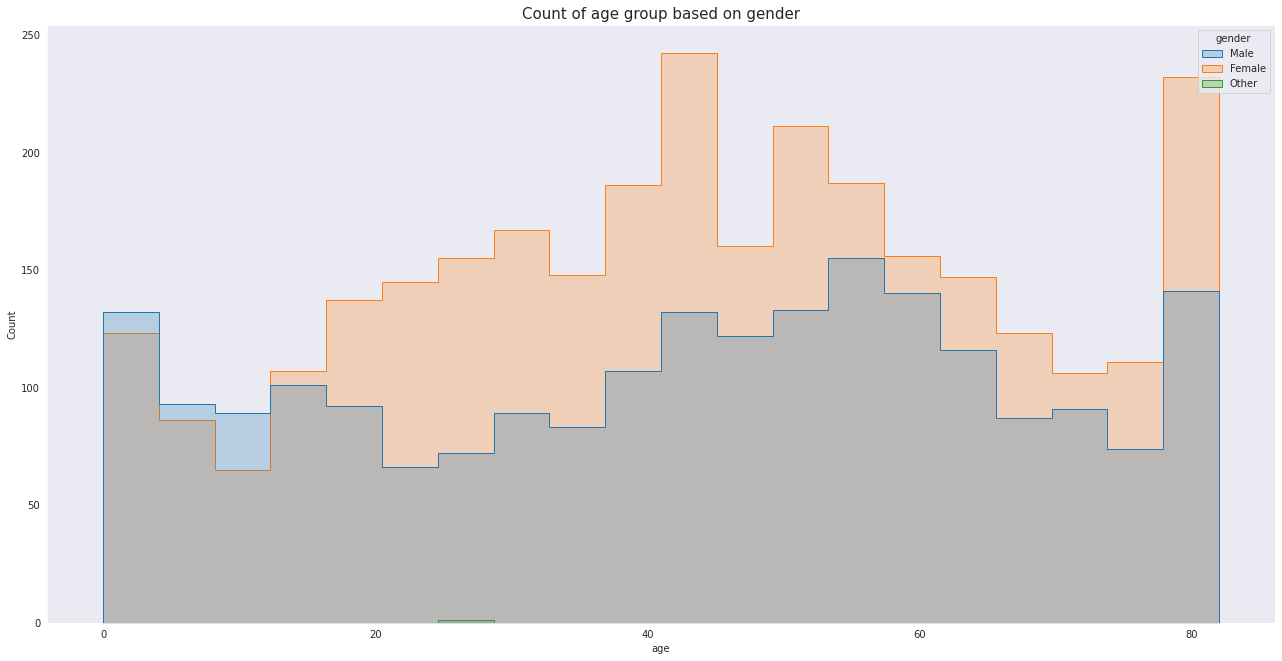

In [23]:
plt.figure(figsize=(22,11))
sns.histplot(
    df, x="age", hue="gender",
    element="step",
     common_norm=False,
)
plt.title('Count of age group based on gender', fontsize=15)
plt.show()

Distribution of Age with BMI

In [24]:
fig = px.box(df,y="age",x="bmi",title=f"Distrubution of Age with bmi")
fig.show()

Scatterplot of Age, BMI and smoking_status

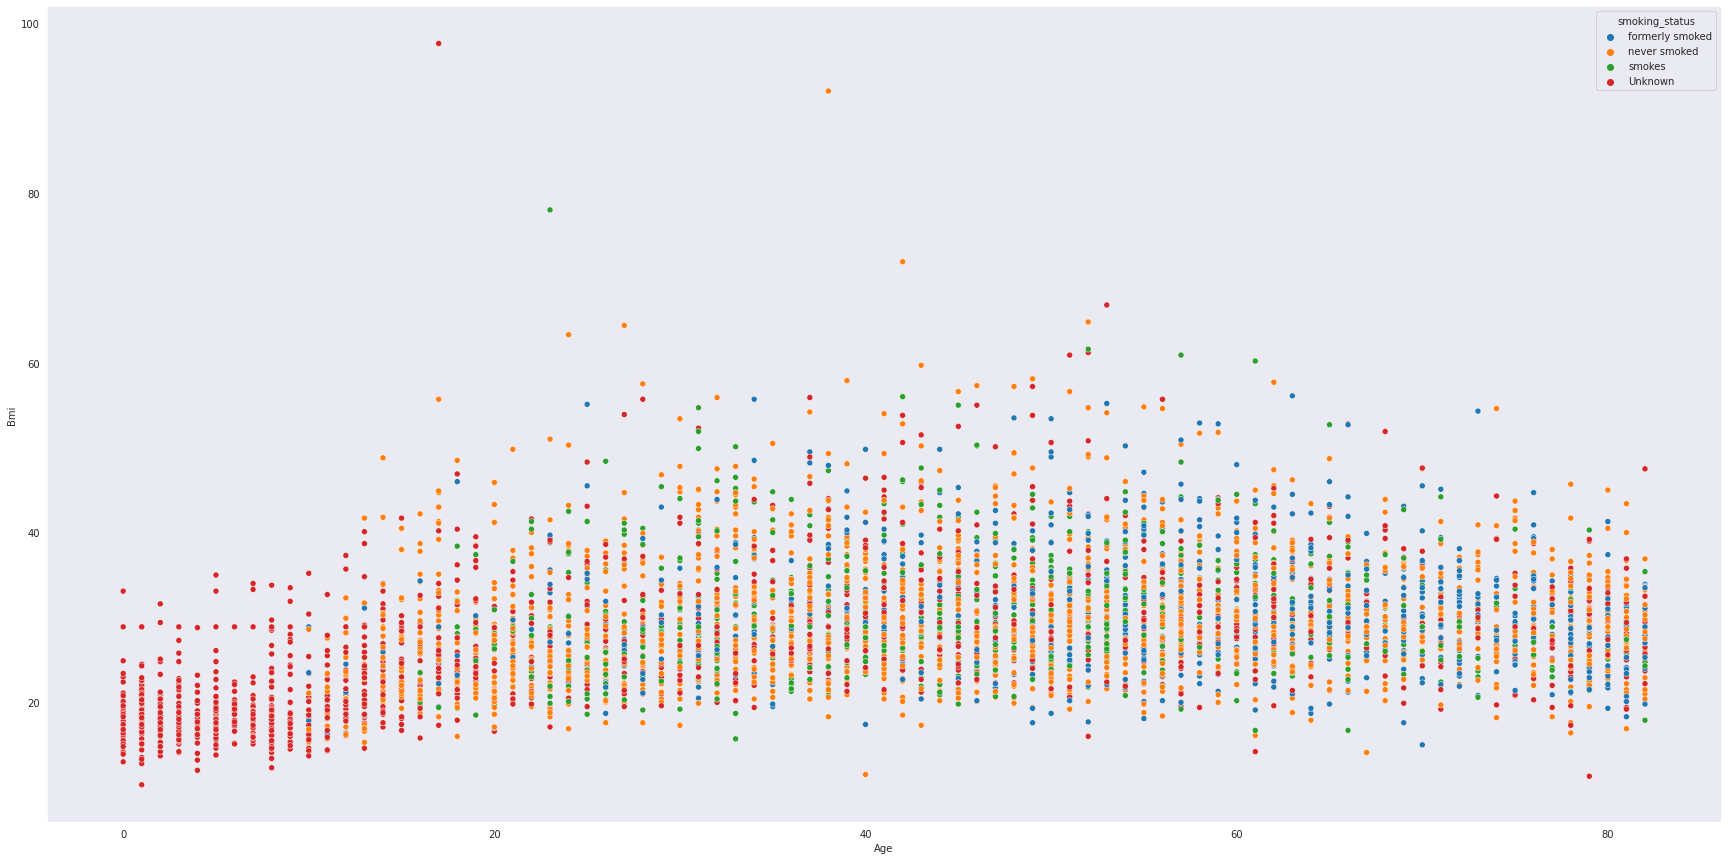

In [25]:
plt.figure(figsize=(30,15))
sns.scatterplot(x='age', y='bmi', hue='smoking_status', data=df)
plt.xlabel("Age")
plt.ylabel("Bmi");

Here, we show the correlation matrix. However, we don't need the id column so we drop that column first. Note: This correlation matrix is only for data with numerical values

In [26]:
df = df.drop("id", axis='columns')

In [27]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm',axis=None)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276303,0.263668,0.238060,0.326271,0.245128
hypertension,0.276303,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263668,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238060,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.326271,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245128,0.127904,0.134914,0.131945,0.038947,1.000000


First step is to make the data numerical

In [28]:
l=LabelEncoder()
df = df.apply(l.fit_transform).astype(int)

In [29]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm',axis=None)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028304,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.050396,-0.026778,-0.062581,0.008929
age,-0.028304,1.000000,0.276303,0.263668,0.679181,-0.362146,0.014169,0.152391,0.342042,0.265595,0.245128
hypertension,0.020994,0.276303,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.121690,0.156654,0.111038,0.127904
heart_disease,0.085447,0.263668,0.108306,1.000000,0.114644,-0.028023,0.003092,0.113220,0.042917,0.048460,0.134914
ever_married,-0.031005,0.679181,0.164243,0.114644,1.000000,-0.352722,0.006261,0.104863,0.348948,0.259647,0.108340
work_type,0.056422,-0.362146,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.026725,-0.310049,-0.305927,-0.032316
Residence_type,-0.006738,0.014169,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.012632,0.002529,0.008237,0.015458
avg_glucose_level,0.050396,0.152391,0.121690,0.113220,0.104863,-0.026725,-0.012632,1.000000,0.118591,0.041203,0.088833
bmi,-0.026778,0.342042,0.156654,0.042917,0.348948,-0.310049,0.002529,0.118591,1.000000,0.227303,0.042307
smoking_status,-0.062581,0.265595,0.111038,0.048460,0.259647,-0.305927,0.008237,0.041203,0.227303,1.000000,0.028123


This is the correlation matrix of all the data once converted into numerical values

# **Visualization**

Showing the Specific Age group of people who suffered stroke

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



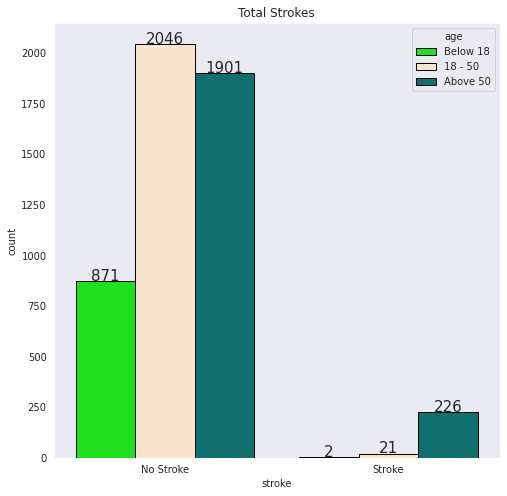

In [30]:
data1 = list(df['stroke'].value_counts())
circle = [data1[0] / sum(data1) * 100,data1[1] / sum(data1) * 100]
colors = ['Lime','bisque','teal']

plt.subplots(figsize = (8,8))
ax = sns.countplot('stroke',data = df, palette = colors,edgecolor = 'black',hue=Agegroup)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 15)
ax.set_xticklabels(['No Stroke','Stroke'])
plt.title('Total Strokes');
plt.show()

Showing the specific BMI of our users

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



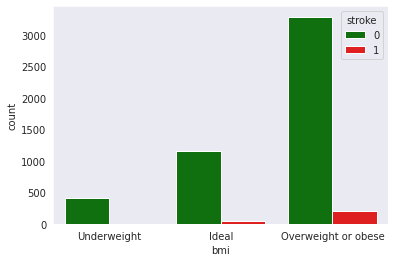

In [31]:
color=['Green','Red']
sns.countplot(Bmi,palette=color,hue=df['stroke'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



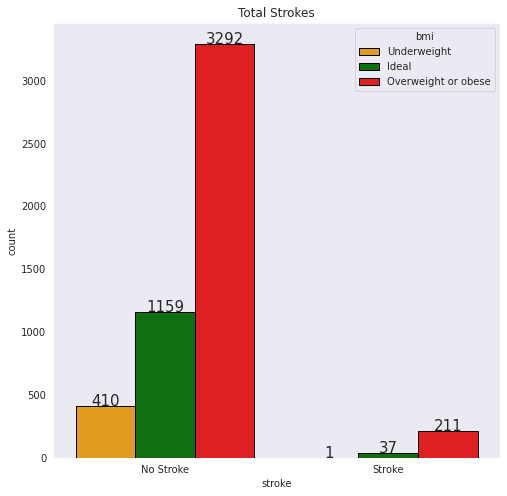

In [32]:
data1 = list(df['stroke'].value_counts())
circle = [data1[0] / sum(data1) * 100,data1[1] / sum(data1) * 100]
colors = ['Orange','Green','Red']

plt.subplots(figsize = (8,8))
ax = sns.countplot('stroke',data = df, palette = colors,edgecolor = 'black',hue=Bmi)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 15)
ax.set_xticklabels(['No Stroke','Stroke'])
plt.title('Total Strokes');
plt.show()

Shwoing the urban and rural population and number of stroke occured in each

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



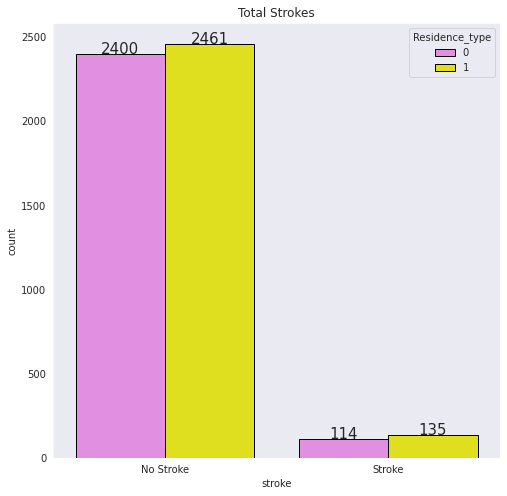

In [33]:
data1 = list(df['stroke'].value_counts())
circle = [data1[0] / sum(data1) * 100,data1[1] / sum(data1) * 100]
colors = ['Violet','yellow']

plt.subplots(figsize = (8,8))
ax = sns.countplot('stroke',data = df, palette = colors,edgecolor = 'black',hue=df['Residence_type'])
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 15)
ax.set_xticklabels(['No Stroke','Stroke'])
plt.title('Total Strokes');
plt.show()

Shwoing smokers and non smokers with stroke

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



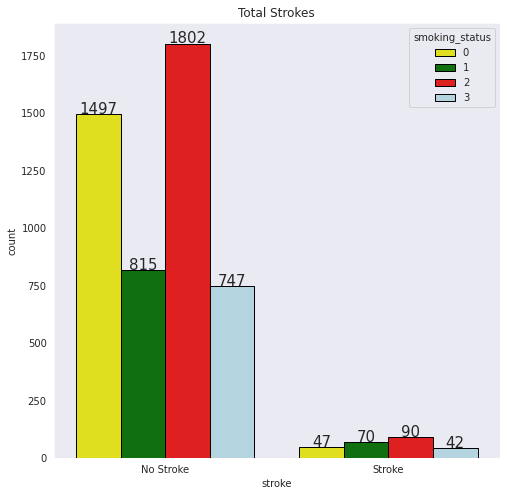

In [34]:
data1 = list(df['stroke'].value_counts())
circle = [data1[0] / sum(data1) * 100,data1[1] / sum(data1) * 100]
colors = ['Yellow','Green','Red','Lightblue']

plt.subplots(figsize = (8,8))
ax = sns.countplot('stroke',data = df, palette = colors,edgecolor = 'black',hue=df['smoking_status'])
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 15)
ax.set_xticklabels(['No Stroke','Stroke'])
plt.title('Total Strokes');
plt.show()

# **Model Development and Testing**

## *KNN*-Model

### Splitting the data into training and testing

In [35]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [37]:
X_train.shape, X_test.shape

((3832, 10), (1278, 10))

### First we test the error for k values to identify the best k value

Minimum error:- 0.05086071987480438 at K = 4


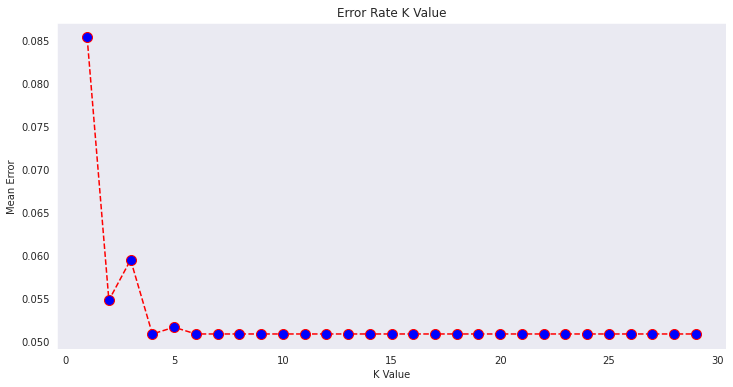

In [38]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

### Building the model and accuracy

In [39]:
knn = KNeighborsClassifier(4) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred_knn) # Calculate Accuracy
knn_train_f1 = f1_score(y_train, y_train_pred_knn, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred_knn) # Calculate Accuracy
knn_test_f1 = f1_score(y_test, y_test_pred_knn, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- F1 score: %s' % knn_test_f1)


Model performance for Training set
- Accuracy: 0.9535490605427975
- F1 score: 0.9328061133637023
----------------------------------
Model performance for Test set
- Accuracy: 0.9491392801251957
- F1 score: 0.92437249842783


Confusion matrix of knn model

In [40]:
cm= confusion_matrix(y_test, y_test_pred_knn)
print(confusion_matrix(y_test,y_test_pred_knn))

[[1213    0]
 [  65    0]]


In [41]:
print(classification_report(y_test,y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## *KNN*-Model with feature selection

### Tree-based feature selection

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X, y)
clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  # notice here the number of features in the data has been decreased


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



(5110, 3)

In [43]:
X_new

array([[  67, 3850,  240],
       [  61, 3588,  162],
       [  80, 2483,  199],
       ...,
       [  35, 1314,  180],
       [  51, 3363,  129],
       [  44, 1454,  135]])

### Splitting the data into training and testing

In [44]:
X_train, X_test, y_train, y_test= train_test_split(X_new, y, test_size= 0.25, random_state=1)

In [45]:
X_train.shape, X_test.shape

((3832, 3), (1278, 3))

### First we test the error for k values to identify the best k value

Minimum error:- 0.05868544600938967 at K = 6


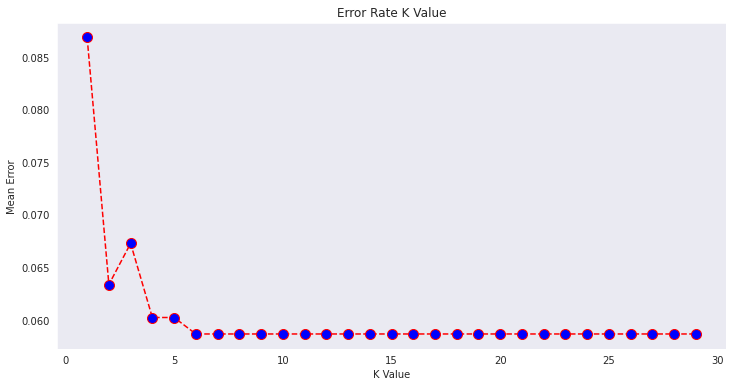

In [46]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

### Building the model and accuracy

In [47]:
knn = KNeighborsClassifier(6) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred_knn) # Calculate Accuracy
knn_train_f1 = f1_score(y_train, y_train_pred_knn, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred_knn) # Calculate Accuracy
knn_test_f1 = f1_score(y_test, y_test_pred_knn, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- F1 score: %s' % knn_test_f1)


Model performance for Training set
- Accuracy: 0.9545929018789144
- F1 score: 0.9324167783906726
----------------------------------
Model performance for Test set
- Accuracy: 0.9413145539906104
- F1 score: 0.9128588540513537


Confusion matrix of knn model

In [48]:
cm= confusion_matrix(y_test, y_test_pred_knn)
print(confusion_matrix(y_test,y_test_pred_knn))

[[1203    0]
 [  75    0]]


In [49]:
print(classification_report(y_test,y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1203
           1       0.00      0.00      0.00        75

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.89      0.94      0.91      1278



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## *KNN*-Model with feature extraction

### get the orginal dataset (old one)

In [50]:
X = df.drop('stroke',axis=1)
y = df['stroke']

### feature extraction using PCA (Principal Component Analysis)

In [51]:
from sklearn.decomposition import PCA

# Assume X is your dataset with features


# Apply PCA with 2 components
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

# The new dataset X_new now contains only the 2 most important components


### Splitting the data into training and testing

In [52]:
X_train, X_test, y_train, y_test= train_test_split(X_new, y, test_size= 0.25, random_state=0)

In [53]:
X_train.shape, X_test.shape

((3832, 2), (1278, 2))

In [54]:
X_train

array([[-1268.6796498 ,   -45.49454051],
       [  -98.55461992,    75.73980095],
       [ 1740.8171001 ,   116.64925508],
       ...,
       [   85.74307335,    -5.1478636 ],
       [ 1055.74712069,    -1.76621019],
       [-1723.75569996,    60.06059934]])

### First we test the error for k values to identify the best k value

Minimum error:- 0.05086071987480438 at K = 6


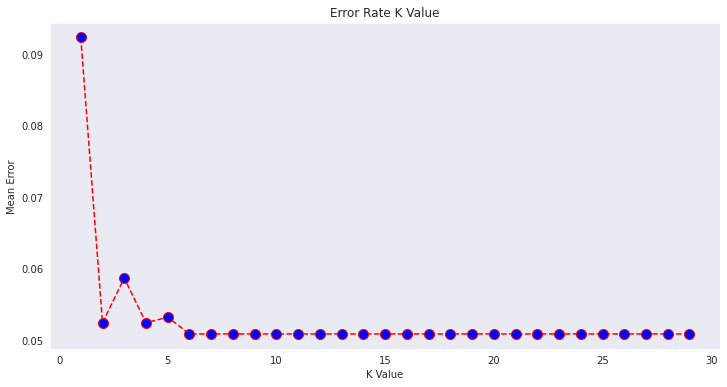

In [55]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

### Building the model and accuracy

In [56]:
knn = KNeighborsClassifier(6) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred_knn) # Calculate Accuracy
knn_train_f1 = f1_score(y_train, y_train_pred_knn, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred_knn) # Calculate Accuracy
knn_test_f1 = f1_score(y_test, y_test_pred_knn, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- F1 score: %s' % knn_test_f1)


Model performance for Training set
- Accuracy: 0.9519832985386222
- F1 score: 0.9285655275585277
----------------------------------
Model performance for Test set
- Accuracy: 0.9491392801251957
- F1 score: 0.92437249842783


Confusion matrix of knn model

In [57]:
cm= confusion_matrix(y_test, y_test_pred_knn)
print(confusion_matrix(y_test,y_test_pred_knn))

[[1213    0]
 [  65    0]]


In [58]:
print(classification_report(y_test,y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Hybird model *KNN* + SVM

### get the orginal dataset (old one)

In [59]:
X = df.drop('stroke',axis=1)
y = df['stroke']

### Splitting the data into training and testing

In [60]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=2)

In [61]:
X_train.shape, X_test.shape

((3832, 10), (1278, 10))

In [62]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1974,1,45,1,0,1,2,1,214,202,0
2726,0,30,0,0,0,2,1,562,232,1
1399,1,37,0,0,1,0,0,806,235,2
4368,0,40,0,0,1,2,1,2278,197,3
1669,1,58,0,0,1,2,1,1926,162,0
...,...,...,...,...,...,...,...,...,...,...
3335,0,41,0,0,1,2,0,1906,233,0
1099,1,34,0,0,1,2,1,1467,141,0
2514,1,18,0,0,0,2,1,1095,109,0
3606,1,45,1,0,1,3,0,3917,377,0


### First we test the error for k values to identify the best k value

Minimum error:- 0.04929577464788732 at K = 8


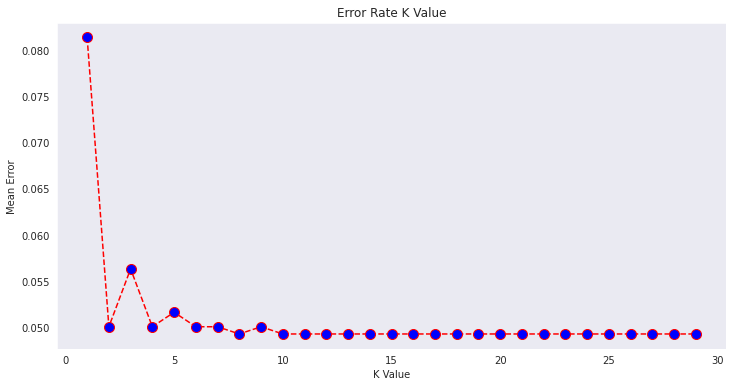

In [63]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

### Building the model and accuracy

In [64]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier


# Create the SVC and KNN models
svc = SVC(kernel='linear', C=1)
knn = KNeighborsClassifier(n_neighbors=54)

# Create the voting classifier
hybrid_model = VotingClassifier(estimators=[('svc', svc), ('knn', knn)], voting='hard')


# Fit the model to the data
hybrid_model.fit(X_train, y_train)

# Use the model to make predictions
y_pred = hybrid_model.predict(X_test)


# Make predictions
y_train_pred_hybrid = hybrid_model.predict(X_train)
y_test_pred_hybrid = hybrid_model.predict(X_test)

# Training set performance
hybrid_train_accuracy = accuracy_score(y_train, y_train_pred_hybrid) # Calculate Accuracy
hybrid_train_f1 = f1_score(y_train, y_train_pred_hybrid, average='weighted') # Calculate F1-score

# Test set performance
hybrid_test_accuracy = accuracy_score(y_test, y_test_pred_hybrid) # Calculate Accuracy
hybrid_test_f1 = f1_score(y_test, y_test_pred_hybrid, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % hybrid_train_accuracy)
print('- F1 score: %s' % hybrid_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % hybrid_test_accuracy)
print('- F1 score: %s' % hybrid_test_f1)

Model performance for Training set
- Accuracy: 0.9514613778705637
- F1 score: 0.9277957164258024
----------------------------------
Model performance for Test set
- Accuracy: 0.9507042253521126
- F1 score: 0.9266792088269691


In [65]:
print(confusion_matrix(y_test,y_test_pred_hybrid))

[[1215    0]
 [  63    0]]


In [66]:
print(classification_report(y_test,y_test_pred_hybrid))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1215
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.90      0.95      0.93      1278



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

